# Textract Parsing

In [1]:
import boto3

In [2]:
client = boto3.client('textract')

In [3]:
bucket = 'sengstacken-temp'
file = '1040_00_vert.png'


In [4]:
%%time

response = client.analyze_document(
    Document={
          'S3Object': {
              'Bucket': bucket,
              'Name': file,
          }
      },
      FeatureTypes=[
          'FORMS',
      ]
  )

CPU times: user 74 ms, sys: 4.09 ms, total: 78 ms
Wall time: 3.28 s


In [14]:
response

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 0.9997851252555847,
     'Height': 1.0,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 0.0, 'Y': 0.0},
     {'X': 0.9997851252555847, 'Y': 9.499177380180949e-17},
     {'X': 0.9997851252555847, 'Y': 1.0},
     {'X': 0.0, 'Y': 1.0}]},
   'Id': 'd25eb452-23c8-4572-b551-3cc957354f04',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['3a370ad5-9e51-4ec6-b49d-e9f61581b712',
      'c0d2a5be-43cf-41c4-abb4-057ab9c676e8',
      '923e9dce-230b-4f8e-a88e-0338a1bcbf51',
      '2917bd00-b66a-4683-8aae-da5ea41e2851',
      'bff57093-0320-4a27-917d-90890bc4cf33',
      '62349ac8-a5f3-4631-98b0-10f34981687a',
      'ee2dff37-87ea-4f2b-ad69-2986e19da220',
      'e3684e70-b3c8-47b8-a41b-f08c6bc8226d',
      '0a8f93a8-6fb5-495a-96f1-aea867ec7e19',
      'd93ad274-03ad-4f29-8fc4-579c16e26b82',
      '302f61f5-02d4-4782-8519-6e7cba28f0b6',
      '19951286-6795-4920-88df-fe37f90fb5d8'

In [12]:
response['DocumentMetadata']

{'Pages': 1}

In [13]:
response['Blocks']

[{'BlockType': 'PAGE',
  'Geometry': {'BoundingBox': {'Width': 0.9997851252555847,
    'Height': 1.0,
    'Left': 0.0,
    'Top': 0.0},
   'Polygon': [{'X': 0.0, 'Y': 0.0},
    {'X': 0.9997851252555847, 'Y': 9.499177380180949e-17},
    {'X': 0.9997851252555847, 'Y': 1.0},
    {'X': 0.0, 'Y': 1.0}]},
  'Id': 'd25eb452-23c8-4572-b551-3cc957354f04',
  'Relationships': [{'Type': 'CHILD',
    'Ids': ['3a370ad5-9e51-4ec6-b49d-e9f61581b712',
     'c0d2a5be-43cf-41c4-abb4-057ab9c676e8',
     '923e9dce-230b-4f8e-a88e-0338a1bcbf51',
     '2917bd00-b66a-4683-8aae-da5ea41e2851',
     'bff57093-0320-4a27-917d-90890bc4cf33',
     '62349ac8-a5f3-4631-98b0-10f34981687a',
     'ee2dff37-87ea-4f2b-ad69-2986e19da220',
     'e3684e70-b3c8-47b8-a41b-f08c6bc8226d',
     '0a8f93a8-6fb5-495a-96f1-aea867ec7e19',
     'd93ad274-03ad-4f29-8fc4-579c16e26b82',
     '302f61f5-02d4-4782-8519-6e7cba28f0b6',
     '19951286-6795-4920-88df-fe37f90fb5d8',
     'd067c3b3-28f3-4336-8218-ac03fb49e75a',
     '25580d6d-ec1d-4

Detected Document Text
Id: 8f6a3146-6bec-4561-9324-01d0d3879b46
    Type: PAGE
    Relationships: [{'Type': 'CHILD', 'Ids': ['07d34e2f-4b05-421a-8e22-ff43315f89a1', '8f307a7a-1a7b-4334-bbe0-190ec84632bf', 'df0e8423-15f7-4f83-b3f4-46a053a09e95', '86a196db-255c-49b2-bff8-245669d86346', 'e30d20e4-b7e5-4a11-a87f-6d594ec2920a', '2206b9d3-037e-4eb0-8ce3-5ef311b7df90', 'da49f311-826c-4918-a334-5e99ab95be7f', 'e86fd33f-12c7-43ef-a90a-67fe394d7436', '18a1c33e-0143-4f57-88ab-96c970a13fac', '043c1500-7a29-4e76-a472-98d27be9420a', '91c6a95a-ac84-45bf-b43e-502cbca11698', '88108dc8-c7b3-43bf-92b0-730f5edbb952', '352380df-27ec-46a7-a84b-4d3fe35cd8a5', '1acbd9c9-ce96-49de-b2c2-b79e3e71cfcc', '299c5044-3743-4a8b-9e5d-b941cd5ef1ac', 'b2a90b36-d2ae-4e19-a3b6-c7eab3e1d98e', '04a80b1f-e224-4d30-a99c-3cc773cf467c', 'd47daa9b-1d8e-4a94-901b-ab33ec03db50', '4c5ec9b1-18bb-43f9-b483-08d24906a8cf', '4e5de7c0-7a7d-4185-9482-24ff47bbf5ec', '2e1eed69-68bc-4c7a-832d-b38c844c36d9', 'a5835e5c-02db-4c11-903a-a6c3f1afd4

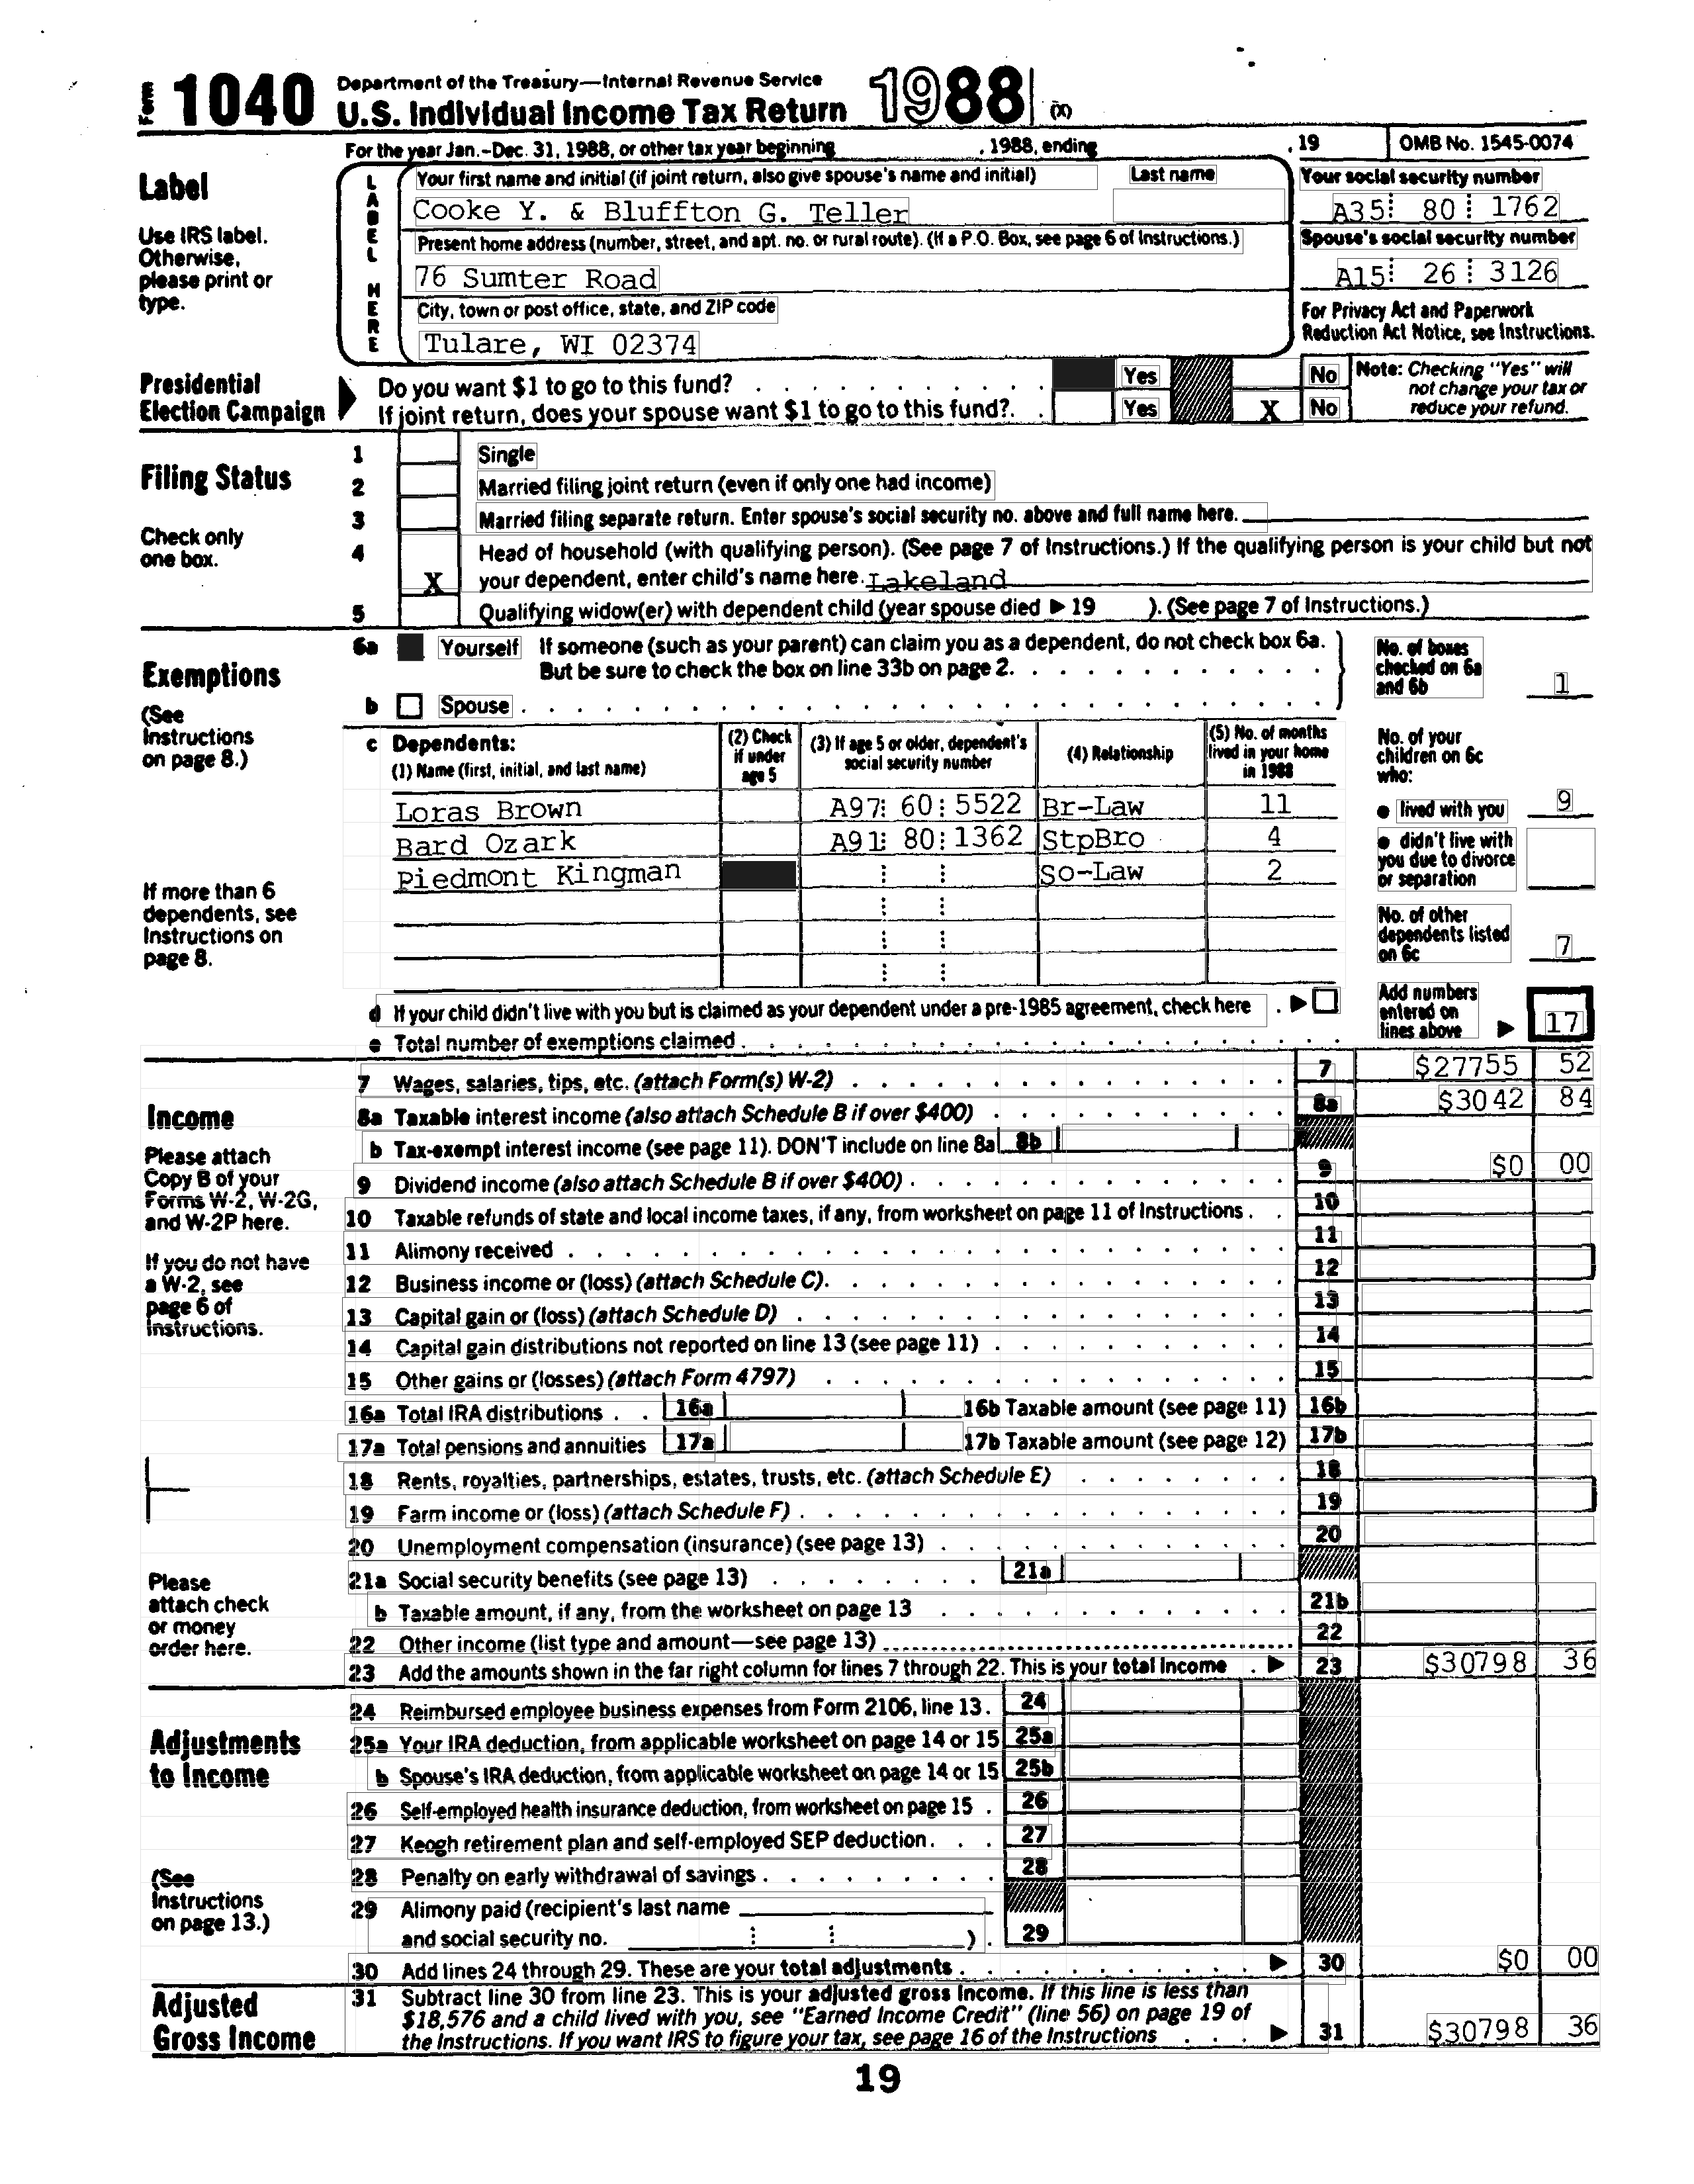

Blocks detected: 1453


In [19]:

#Analyzes text in a document stored in an S3 bucket. Display polygon box around text and angled text 
import boto3
import io
from io import BytesIO
import sys

import math
from PIL import Image, ImageDraw, ImageFont

def ShowBoundingBox(draw,box,width,height,boxColor):
             
    left = width * box['Left']
    top = height * box['Top'] 
    draw.rectangle([left,top, left + (width * box['Width']), top +(height * box['Height'])],outline=boxColor)   

def ShowSelectedElement(draw,box,width,height,boxColor):
             
    left = width * box['Left']
    top = height * box['Top'] 
    draw.rectangle([left,top, left + (width * box['Width']), top +(height * box['Height'])],fill=boxColor)  

# Displays information about a block returned by text detection and text analysis
def DisplayBlockInformation(block):
    print('Id: {}'.format(block['Id']))
    if 'Text' in block:
        print('    Detected: ' + block['Text'])
    print('    Type: ' + block['BlockType'])
   
    if 'Confidence' in block:
        print('    Confidence: ' + "{:.2f}".format(block['Confidence']) + "%")

    if block['BlockType'] == 'CELL':
        print("    Cell information")
        print("        Column:" + str(block['ColumnIndex']))
        print("        Row:" + str(block['RowIndex']))
        print("        Column Span:" + str(block['ColumnSpan']))
        print("        RowSpan:" + str(block['ColumnSpan']))    
    
    if 'Relationships' in block:
        print('    Relationships: {}'.format(block['Relationships']))
    print('    Geometry: ')
    print('        Bounding Box: {}'.format(block['Geometry']['BoundingBox']))
    print('        Polygon: {}'.format(block['Geometry']['Polygon']))
    
    if block['BlockType'] == "KEY_VALUE_SET":
        print ('    Entity Type: ' + block['EntityTypes'][0])
    
    if block['BlockType'] == 'SELECTION_ELEMENT':
        print('    Selection element detected: ', end='')

        if block['SelectionStatus'] =='SELECTED':
            print('Selected')
        else:
            print('Not selected')    
    
    if 'Page' in block:
        print('Page: ' + block['Page'])
    print()

def process_text_analysis(bucket, document):

    #Get the document from S3
    s3_connection = boto3.resource('s3')
                          
    s3_object = s3_connection.Object(bucket,document)
    s3_response = s3_object.get()

    stream = io.BytesIO(s3_response['Body'].read())
    image=Image.open(stream)

    # Analyze the document
    client = boto3.client('textract')
    
    image_binary = stream.getvalue()
    response = client.analyze_document(Document={'Bytes': image_binary},
        FeatureTypes=["TABLES", "FORMS"])

    ### Alternatively, process using S3 object ###
    #response = client.analyze_document(
    #    Document={'S3Object': {'Bucket': bucket, 'Name': document}},
    #    FeatureTypes=["TABLES", "FORMS"])

    ### To use a local file ###
    # with open("pathToFile", 'rb') as img_file:
        ### To display image using PIL ###
    #    image = Image.open()
        ### Read bytes ###
    #    img_bytes = img_file.read()
    #    response = client.analyze_document(Document={'Bytes': img_bytes}, FeatureTypes=["TABLES", "FORMS"])

    
    #Get the text blocks
    blocks=response['Blocks']
    width, height =image.size  
    draw = ImageDraw.Draw(image)  
    print ('Detected Document Text')
   
    # Create image showing bounding box/polygon the detected lines/text
    for block in blocks:

        DisplayBlockInformation(block)
             
        draw=ImageDraw.Draw(image)
        if block['BlockType'] == "KEY_VALUE_SET":
            if block['EntityTypes'][0] == "KEY":
                ShowBoundingBox(draw, block['Geometry']['BoundingBox'],width,height,'red')
            else:
                ShowBoundingBox(draw, block['Geometry']['BoundingBox'],width,height,'green')  
            
        if block['BlockType'] == 'TABLE':
            ShowBoundingBox(draw, block['Geometry']['BoundingBox'],width,height, 'blue')

        if block['BlockType'] == 'CELL':
            ShowBoundingBox(draw, block['Geometry']['BoundingBox'],width,height, 'yellow')
        if block['BlockType'] == 'SELECTION_ELEMENT':
            if block['SelectionStatus'] =='SELECTED':
                ShowSelectedElement(draw, block['Geometry']['BoundingBox'],width,height, 'blue')    
   
            #uncomment to draw polygon for all Blocks
            #points=[]
            #for polygon in block['Geometry']['Polygon']:
            #    points.append((width * polygon['X'], height * polygon['Y']))
            #draw.polygon((points), outline='blue')
            
    # Display the image
    image.show()
    return len(blocks)

def main():

    bucket = 'sengstacken-temp'
    document = '1040_00_vert.png'
    block_count=process_text_analysis(bucket,document)
    print("Blocks detected: " + str(block_count))
    
if __name__ == "__main__":
    main()

In [41]:
# process using image bytes
client = boto3.client('textract')

response = response = client.analyze_document(
Document={
      'S3Object': {
          'Bucket': bucket,
          'Name': document,
      }
  },
  FeatureTypes=[
      'FORMS',
  ])

In [42]:
response

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 0.9997851252555847,
     'Height': 1.0,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 0.0, 'Y': 0.0},
     {'X': 0.9997851252555847, 'Y': 9.499177380180949e-17},
     {'X': 0.9997851252555847, 'Y': 1.0},
     {'X': 0.0, 'Y': 1.0}]},
   'Id': 'fcefcbfb-546e-4fd9-8be8-82beb10f2a11',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['8f75425b-fa42-48cc-af0d-c6e47101bcd4',
      '6c22bf3d-0273-4e06-8b05-cc5c23246fa8',
      '414b9241-fed2-4ba2-a315-9479e41863ff',
      '01d4065f-dded-4e7d-bf2d-d3cd8a4913b4',
      'a48ae4ca-746a-4ff3-959e-092eb7d599f1',
      'f60b3c22-c4e2-40eb-aaec-bcc26df6c119',
      'aece854d-af7c-427f-b70a-160262a5c465',
      '76afc5fe-780a-44a2-8a26-511377cbe43d',
      'b3a4910c-28a1-4c8f-8888-fea21c2efca4',
      '75688131-7a09-4170-9b1e-ef211c1304b5',
      'b794a161-5ca2-4a7c-85e6-ac1b84be5b49',
      '44fe35c0-daf1-43b9-a57a-d6a47ff5e5bf'

In [44]:
with open('response.out','w') as handle:
    handle.write(json.dumps(response))

In [13]:
import boto3
import sys
import re
import json


def get_kv_map(bucket,document):

#     with open(file_name, 'rb') as file:
#         img_test = file.read()
#         bytes_test = bytearray(img_test)
#         print('Image loaded', file_name)

    # process using image bytes
    client = boto3.client('textract')

    response = response = client.analyze_document(
    Document={
          'S3Object': {
              'Bucket': bucket,
              'Name': document,
          }
      },
      FeatureTypes=[
          'FORMS',
      ])

    # Get the text blocks
    blocks=response['Blocks']
    

    # get key and value maps
    key_map = {}
    value_map = {}
    block_map = {}
    for block in blocks:
        block_id = block['Id']
        block_map[block_id] = block
        if block['BlockType'] == "KEY_VALUE_SET":
            if 'KEY' in block['EntityTypes']:
                key_map[block_id] = block
            else:
                value_map[block_id] = block

    return key_map, value_map, block_map


def get_kv_relationship(key_map, value_map, block_map):
    kvs = {}
    for block_id, key_block in key_map.items():
        value_block = find_value_block(key_block, value_map)
        key = get_text(key_block, block_map)
        val = get_text(value_block, block_map)
        kvs[key] = val
    return kvs


def find_value_block(key_block, value_map):
    for relationship in key_block['Relationships']:
        if relationship['Type'] == 'VALUE':
            for value_id in relationship['Ids']:
                value_block = value_map[value_id]
    return value_block


def get_text(result, blocks_map):
    text = ''
    conf = []
    if 'Relationships' in result:
        for relationship in result['Relationships']:
            if relationship['Type'] == 'CHILD':
                for child_id in relationship['Ids']:
                    word = blocks_map[child_id]
                    if word['BlockType'] == 'WORD':
                        text += word['Text'] + ' '
                        conf.append(word['Confidence'])
                    if word['BlockType'] == 'SELECTION_ELEMENT':
                        if word['SelectionStatus'] == 'SELECTED':
                            text += 'X '   
                            conf.append(word['Confidence'])

    print(text,conf)
    return text


def print_kvs(kvs):
    for key, value in kvs.items():
        print(key, ":", value)


def search_value(kvs, search_key):
    for key, value in kvs.items():
        if re.search(search_key, key, re.IGNORECASE):
            return value



In [ ]:
block

In [34]:
!pip install fuzzywuzzy python-Levenshtein

     |████████████████████████████████| 50 kB 6.6 MB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp36-cp36m-linux_x86_64.whl size=155935 sha256=5d174cad293dc9c10b9e01b1654e730823a6bf851f13d17f6c37cdb0f2122415
  Stored in directory: /home/ec2-user/.cache/pip/wheels/4a/a4/bf/d761b0899395c75fa76d003d607b3869ee47f5035b8afc30a2
Successfully built python-Levenshtein


In [35]:
from fuzzywuzzy import process

In [37]:
process.extract('tax exempt interast income',kvs.keys())

[("b Tax-exempt interest income (see page 11). DON'T include on line 8a 8b ",
  86),
 ('23 Add the amounts shown in the far right column for lines 7 through 22. This is your total income 23 ',
  86),
 ('19 Farm income or (loss) (attach Schedule F) 19 ', 86),
 ('Sa Taxable interest income (also attach Schedule B if over $400) 8a ', 86),
 ('10 Taxable refunds of state and local income taxes, if any, from worksheet on page 11 of Instructions 10 ',
  86)]

In [12]:
kvs

{'Your social security number ': 'A351 80 : 1762 ',
 "Spouse's social security number ": 'A15 26 3126 ',
 'Yes ': 'X ',
 'Present home address (number, street, and apt. no. or rural route) (If a P.O. Box, see page 6 of Instructions.) ': '76 Sumter Road ',
 '24 Reimbursed employee business expenses from Form 2106, line 13. 24 ': '',
 "b Tax-exempt interest income (see page 11). DON'T include on line 8a 8b ": '',
 'City, town or post office, state, and ZIP code ': 'Tulare, WI 02374 ',
 '14 Capital gain distributions not reported on line 13 (see page 11) 14 ': '',
 '28 Penalty on early withdrawal of savings 28 ': '',
 '21a Social security benefits (see page 13) 21a ': '',
 '27 Keogh retirement plan and self-employed SEP deduction 27 ': '',
 '23 Add the amounts shown in the far right column for lines 7 through 22. This is your total income 23 ': '$30798 36 ',
 'Spouse ': '',
 "b Spouse's IRA deduction, from applicable worksheet on page 14 or 15 25b ": '',
 '26 Self-employed health insuranc

In [14]:
bucket = 'sengstacken-temp'
document = '1040_00_vert.png'

key_map, value_map, block_map = get_kv_map(bucket,document)

# Get Key Value relationship
kvs = get_kv_relationship(key_map, value_map, block_map)
print("\n\n== FOUND KEY : VALUE pairs ===\n")
print_kvs(kvs)

# # Start searching a key value
# while input('\n Do you want to search a value for a key? (enter "n" for exit) ') != 'n':
#     search_key = input('\n Enter a search key:')
#     print('The value is:', search_value(kvs, search_key))


Your social security number  [98.87627410888672, 99.26873779296875, 99.5639877319336, 99.55038452148438]
A351 80 : 1762  [44.09333038330078, 93.76531982421875, 80.01273345947266, 93.13941955566406]
Spouse's social security number  [97.39066314697266, 99.03724670410156, 99.29132843017578, 99.5772705078125]
A15 26 3126  [53.44044494628906, 87.71110534667969, 95.30452728271484]
Yes  [99.84555053710938]
 []
Present home address (number, street, and apt. no. or rural route) (If a P.O. Box, see page 6 of Instructions.)  [98.77473449707031, 99.5347671508789, 99.445556640625, 95.75940704345703, 97.50381469726562, 99.76243591308594, 99.10372924804688, 97.78624725341797, 98.7502212524414, 93.06136322021484, 89.25708770751953, 79.2442855834961, 83.75916290283203, 92.55162811279297, 83.15509796142578, 99.6908950805664, 99.70465087890625, 98.4132080078125, 99.34651184082031, 81.67374420166016]
76 Sumter Road  [99.78076934814453, 99.31492614746094, 99.86323547363281]
24 Reimbursed employee business 